<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/Notebook_4_OutlierRemovals_Base_N_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
!pip install imbalanced-learn

In [3]:
# To show all columns' names on a large pandas dataframe
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'


od.download(dataset_url)

data_dir = './craigslist-carstrucks-data'

100%|██████████| 262M/262M [00:01<00:00, 178MB/s]


In [6]:
df = pd.read_csv(data_dir+"/vehicles.csv")

### **Checking outliers for each labels Outlier Detection**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### **First Checking Outliers for Numeric data columns** <br>
Numeric columns : [ price ,year , odometer , lat , long ] <br>

Outlier removal in year column


In [8]:
df['year'].isnull().sum()

1205

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


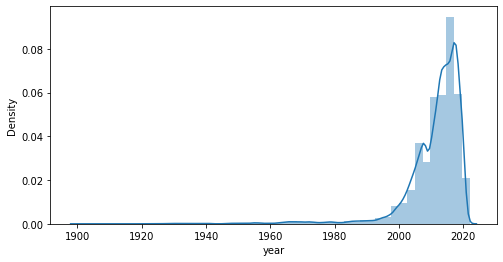

In [9]:
# checking the distribution of year column
import seaborn as sns

sns.distplot(df['year'].dropna())

**Observation:**
1. Data is left Skewed

In [10]:
#import seaborn as sns
#sns.boxplot(df['year'])

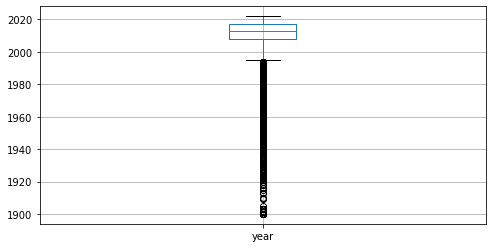

In [11]:
import seaborn as sns
figure=df.boxplot(column="year")

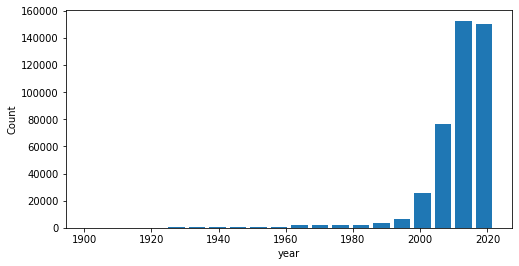

In [12]:
# Histogram for year column

plt.hist(df.year, bins=20, rwidth=0.8)
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

In [13]:
df['year'].describe()

count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

As per the above graphs it is clearly shows that data of year is left skewed. 
For skewed Data , IQR techniqie is implement to remove outliers

In [14]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

In [15]:
lower_lim_year = df['year'].quantile(0.25)-(IQR*1.5)
upper_lim_year = df['year'].quantile(0.75)+(IQR*1.5)
print(lower_lim_year), print(upper_lim_year)

1994.5
2030.5


(None, None)

In [16]:
#### Extreme outliers
#lower_bridge=df['year'].quantile(0.25)-(IQR*3)
#upper_bridge=df['year'].quantile(0.75)+(IQR*3)
#print(lower_bridge), print(upper_bridge)

df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,426880.000,426880.000,425675.000,422480.000,0.000,420331.000,420331.000
mean,7311486634.224,75199.033,2011.235,98043.331,nan,38.494,-94.749
std,4473170.413,12182282.174,9.452,213881.501,nan,5.842,18.365
min,7207408119.000,0.000,1900.000,0.000,nan,-84.122,-159.828
25%,7308143339.250,5900.000,2008.000,37704.000,nan,34.602,-111.940
50%,7312620821.000,13950.000,2013.000,85548.000,nan,39.150,-88.433
75%,7315253543.500,26485.750,2017.000,133542.500,nan,42.399,-80.832
max,7317101084.000,3736928711.000,2022.000,10000000.000,nan,82.391,173.886


In [17]:
#Q1 = df.year.quantile(0.25)
#Q3 = df.year.quantile(0.75)
#Q1, Q3

In [18]:
#IQR = Q3 - Q1
#IQR

In [19]:
#lower_limit = Q1 - 1.5*IQR
#upper_limit = Q3 + 1.5*IQR
#lower_limit, upper_limit

In [20]:
df.shape

(426880, 26)

In [21]:
# Removing Outliers in year c

df = df[(df['year'] >= lower_lim_year) & (df['year'] <= upper_lim_year)]

In [22]:
print("Shape of dataset after Outliers removal in YEAR column : ",len(df))

Shape of dataset after Outliers removal in YEAR column :  409779


In [23]:
print("Total no of data points dropped : ",426880 - 409779)


Total no of data points dropped :  17101


**Outlier removal for odometer column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


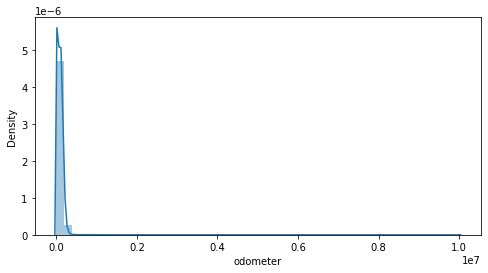

In [24]:
# checking the distribution of odometer column

import seaborn as sns

sns.distplot(df['odometer'].dropna())

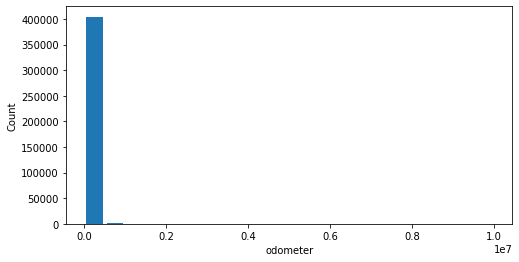

In [25]:
# creating boxplot for odometer column

plt.hist(df.odometer, bins=20, rwidth=0.8)      
plt.xlabel('odometer')
plt.ylabel('Count')
plt.show()

In [26]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,409779.000,409779.000,409779.000,405487.000,0.000,403335.000,403335.000
mean,7311476996.593,68467.508,2012.636,95939.186,nan,38.499,-94.661
std,4382678.369,12037220.314,5.465,160097.929,nan,5.846,18.368
min,7301583321.000,0.000,1995.000,0.000,nan,-84.122,-159.828
25%,7308093514.000,5975.000,2009.000,38123.000,nan,34.620,-111.939
50%,7312571619.000,13995.000,2014.000,86190.000,nan,39.160,-88.241
75%,7315242212.500,26590.000,2017.000,134000.000,nan,42.426,-80.830
max,7317101084.000,3736928711.000,2022.000,10000000.000,nan,82.253,173.886


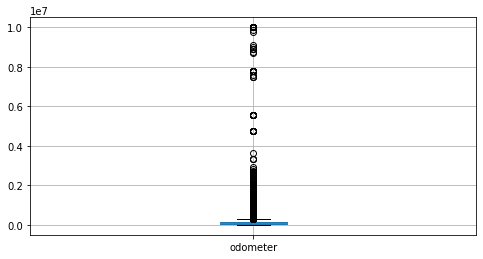

In [27]:
figure=df.boxplot(column="odometer")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


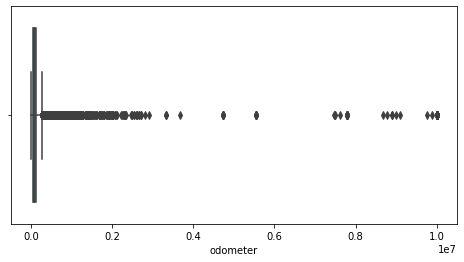

In [28]:
sns.boxplot(df['odometer'])

Odometer data is right skewed as per the above graphs. To tackle this data , IQR techinique is implemented

In [29]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*1.5)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*1.5)
print(lower_lim_odometer), print(upper_lim_odometer)

38109.5
134013.5


(None, None)

In [30]:
df.shape

(409779, 26)

In [31]:
# Removing Outliers in year c

df = df[(df['odometer'] >= lower_lim_odometer) & (df['odometer'] <= upper_lim_odometer)]

In [32]:
df.odometer.max()

134012.0

In [33]:
print("Shape of dataset after Outliers removal in odometer column : ",len(df))

Shape of dataset after Outliers removal in odometer column :  202814


In [34]:
print("Total no of data points dropped : ",421344 - 210705)

Total no of data points dropped :  210639


In [35]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,202814.000,202814.000,202814.000,202814.000,0.000,198683.000,198683.000
mean,7311514728.489,48482.856,2012.789,85623.300,nan,38.580,-94.997
std,4342947.182,9511909.922,4.440,27451.815,nan,5.867,18.747
min,7301583321.000,0.000,1995.000,38110.000,nan,-81.838,-159.828
25%,7308204162.250,6999.000,2011.000,62269.000,nan,34.829,-114.465
50%,7312626407.500,13967.000,2014.000,86200.000,nan,39.315,-89.230
75%,7315202621.000,23500.000,2016.000,108539.000,nan,42.483,-80.392
max,7317098055.000,3024942282.000,2022.000,134012.000,nan,77.861,167.630


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202814 entries, 27 to 426869
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            202814 non-null  int64  
 1   url           202814 non-null  object 
 2   region        202814 non-null  object 
 3   region_url    202814 non-null  object 
 4   price         202814 non-null  int64  
 5   year          202814 non-null  float64
 6   manufacturer  196985 non-null  object 
 7   model         201298 non-null  object 
 8   condition     111951 non-null  object 
 9   cylinders     122066 non-null  object 
 10  fuel          201660 non-null  object 
 11  odometer      202814 non-null  float64
 12  title_status  198602 non-null  object 
 13  transmission  201922 non-null  object 
 14  VIN           132751 non-null  object 
 15  drive         144612 non-null  object 
 16  size          60311 non-null   object 
 17  type          161638 non-null  object 
 18  pai

In [37]:
# df.to_csv('Vehicles_WithoutOulier.csv')

**Exploratory Data Analysis (EDA)**

In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [38]:
df.shape

(202814, 26)

In [39]:
# features with null values

[features for features in df.columns if df[features].isnull().sum()>0]

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'county',
 'lat',
 'long']

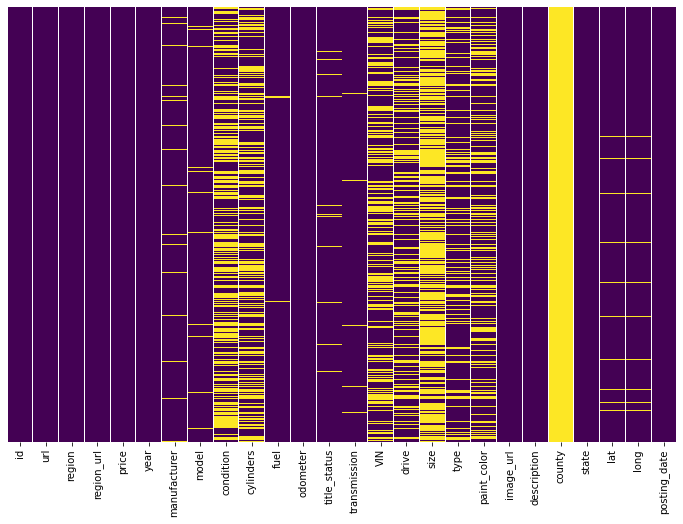

In [40]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Country column contains all null values , Drop the column



In [41]:
df['county'].isnull().sum()

202814

In [42]:
df.drop('county',axis =1 , inplace = True)

In [43]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

size            0.702629
condition       0.448011
cylinders       0.398138
VIN             0.345454
paint_color     0.295818
drive           0.286972
type            0.203023
manufacturer    0.028741
title_status    0.020768
long            0.020368
lat             0.020368
model           0.007475
fuel            0.005690
transmission    0.004398
dtype: float64

Text(0, 0.5, 'Features')

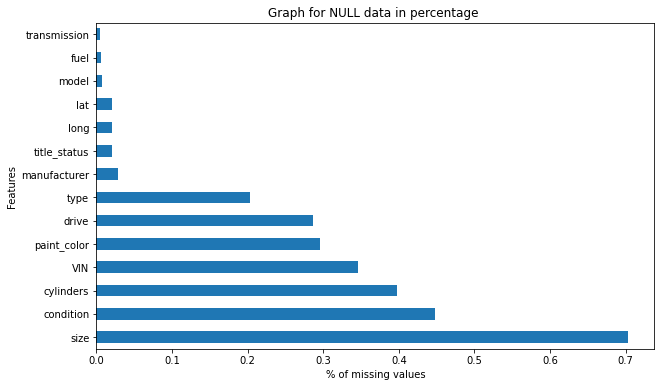

In [44]:
# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**TRANSMISSION**

In [45]:
# transmission column

df['transmission'].isnull().sum()

892

In [46]:
df['transmission'].value_counts()

automatic    173871
other         18604
manual         9447
Name: transmission, dtype: int64

In [47]:
# Replacing null values in transmission column

df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])

In [48]:
print("Number of null values :" ,df.transmission.isnull().sum())
print(df.transmission.value_counts())

Number of null values : 0
automatic    174763
other         18604
manual         9447
Name: transmission, dtype: int64


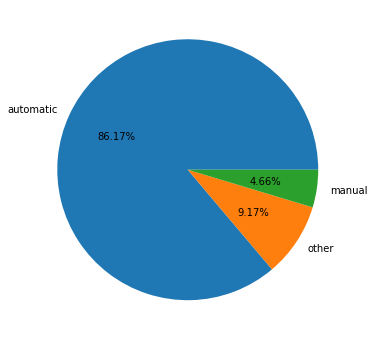

In [49]:
## Pie Chart for transmission column

plt.figure(figsize=(10,6))
plt.pie(df.transmission.value_counts().values,labels=df.transmission.value_counts().index,autopct='%1.2f%%')
plt.show()

In [50]:
# Transmission looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['transmission'] = LabelEncoding.fit_transform(df['transmission'])

In [51]:
df['transmission'].value_counts()

0    174763
2     18604
1      9447
Name: transmission, dtype: int64

Text(0, 0.5, 'Features')

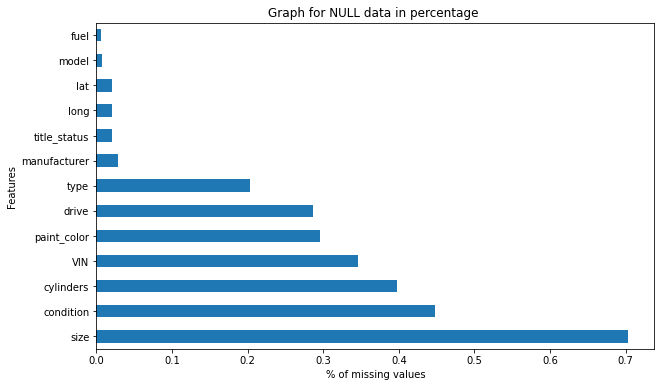

In [52]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**FUEL**

In [53]:
df['fuel'].isnull().sum()

1154

In [54]:
df['fuel'].value_counts()

gas         173474
diesel       12733
other        12234
hybrid        2570
electric       649
Name: fuel, dtype: int64

In [55]:
len (df[~ ((df['fuel'] == 'other') | (df['fuel'] == 'gas') | (df['fuel'] == 'diesel') | (df['fuel'] == 'hybrid') | (df['fuel'] == 'electric')) ])

1154

In [56]:
df.transmission.mode()

0    0
dtype: int64

In [57]:
# Replacing null values in fuel column

df['fuel'] = df['fuel'].fillna('gas')

In [58]:
len (df[~ ((df['fuel'] == 'other') | (df['fuel'] == 'gas') | (df['fuel'] == 'diesel') | (df['fuel'] == 'hybrid') | (df['fuel'] == 'electric')) ])

0

In [59]:
print("Number of null values :" ,df.fuel.isnull().sum())
print(df.fuel.value_counts())

Number of null values : 0
gas         174628
diesel       12733
other        12234
hybrid        2570
electric       649
Name: fuel, dtype: int64


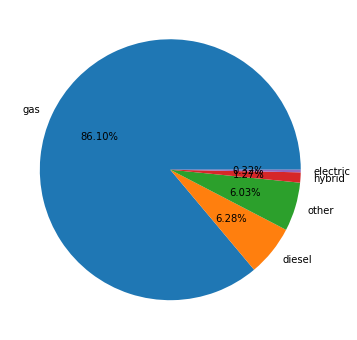

In [60]:
## Pie Chart for fuel column

plt.figure(figsize=(10,6))
plt.pie(df.fuel.value_counts().values,labels=df.fuel.value_counts().index,autopct='%1.2f%%')
plt.show()

In [61]:
# fuel looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['fuel'] = LabelEncoding.fit_transform(df['fuel'])

In [62]:
df['fuel'].value_counts()

2    174628
0     12733
4     12234
3      2570
1       649
Name: fuel, dtype: int64

Text(0, 0.5, 'Features')

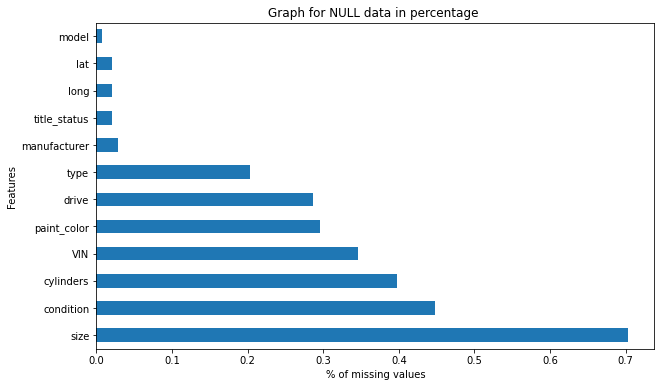

In [63]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

MODEL

In [64]:
df['model'].isnull().sum()

1516

In [65]:
len(df['model'].unique())

15663

Model column contains 15663 unique values , will drop this column for now

In [66]:
df.drop('model', axis=1 , inplace=True)

Text(0, 0.5, 'Features')

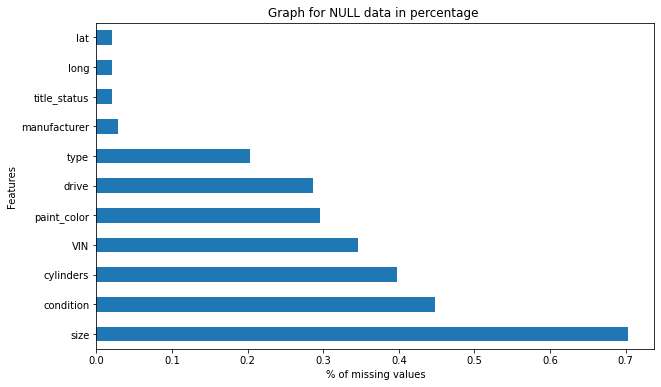

In [67]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**Drop Unnecessary columns for now**
1. id
2. url
3. region
4. region_url
5. VIN
6. image_url
7. description
8. state
9. lat
10. long
11. posting_date


In [68]:
df.drop(['id','url','region','region_url','VIN','image_url','description','state','lat','long','posting_date'], axis =1 , inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202814 entries, 27 to 426869
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         202814 non-null  int64  
 1   year          202814 non-null  float64
 2   manufacturer  196985 non-null  object 
 3   condition     111951 non-null  object 
 4   cylinders     122066 non-null  object 
 5   fuel          202814 non-null  int64  
 6   odometer      202814 non-null  float64
 7   title_status  198602 non-null  object 
 8   transmission  202814 non-null  int64  
 9   drive         144612 non-null  object 
 10  size          60311 non-null   object 
 11  type          161638 non-null  object 
 12  paint_color   142818 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 21.7+ MB


Text(0, 0.5, 'Features')

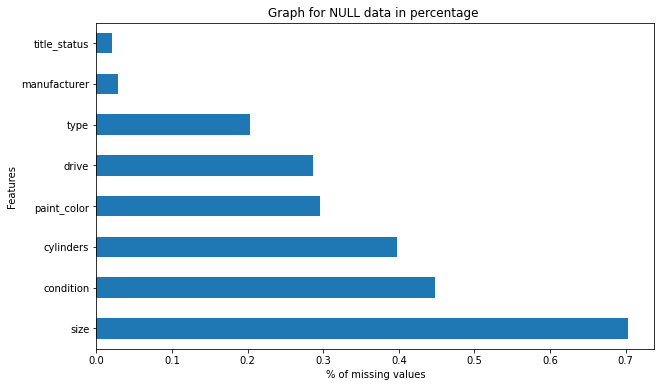

In [70]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**title_status**

In [71]:
df['title_status'].isnull().sum()

4212

In [72]:
df['title_status'].value_counts()

clean         191357
rebuilt         4367
salvage         1971
lien             770
missing           95
parts only        42
Name: title_status, dtype: int64

In [73]:
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])

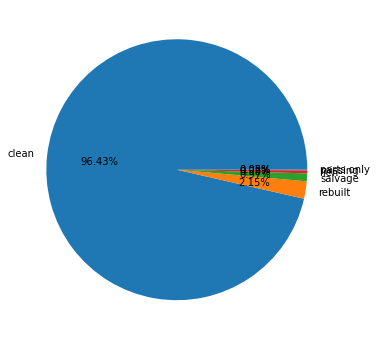

In [74]:
## Pie Chart for title_status column

plt.figure(figsize=(10,6))
plt.pie(df.title_status.value_counts().values,labels=df.title_status.value_counts().index,autopct='%1.2f%%')
plt.show()

In [75]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['title_status'] = LabelEncoding.fit_transform(df['title_status'])

In [76]:
df['title_status'].value_counts()

0    195569
4      4367
5      1971
1       770
2        95
3        42
Name: title_status, dtype: int64

Text(0, 0.5, 'Features')

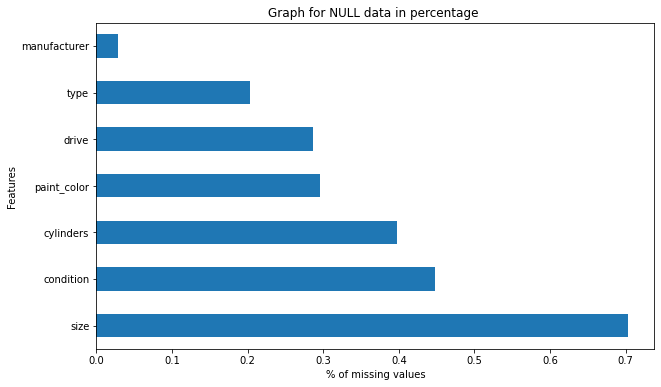

In [77]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**manufacturer**

In [78]:
df['manufacturer'].isnull().sum()

5829

In [79]:
df['manufacturer'].value_counts()

ford               33478
chevrolet          24368
toyota             14723
nissan             10356
jeep                9517
bmw                 9493
honda               9400
ram                 8457
mercedes-benz       7228
gmc                 7218
dodge               6683
hyundai             5995
volkswagen          4878
kia                 4797
subaru              4626
lexus               4121
audi                4092
chrysler            3547
cadillac            3345
mazda               2460
buick               2386
acura               2330
infiniti            2233
lincoln             1746
volvo               1424
mini                1362
mitsubishi          1278
rover               1216
porsche              902
pontiac              775
jaguar               653
saturn               518
mercury              475
fiat                 439
tesla                316
alfa-romeo           110
harley-davidson       27
ferrari                7
land rover             4
aston-martin           2


In [80]:
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])

In [81]:
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'ram', 'honda',
       'dodge', 'lexus', 'volvo', 'infiniti', 'subaru', 'acura',
       'lincoln', 'mercedes-benz', 'bmw', 'chrysler', 'nissan', 'mazda',
       'porsche', 'buick', 'kia', 'volkswagen', 'cadillac', 'hyundai',
       'mini', 'audi', 'mitsubishi', 'pontiac', 'jaguar', 'fiat', 'rover',
       'tesla', 'saturn', 'alfa-romeo', 'mercury', 'harley-davidson',
       'ferrari', 'land rover', 'aston-martin'], dtype=object)

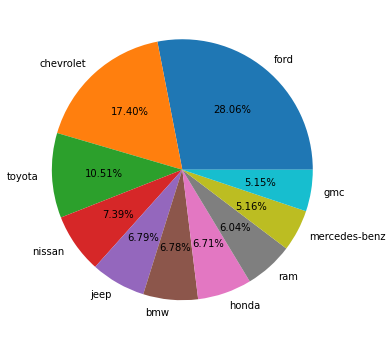

In [82]:
## Pie Chart for TOP 10 manufacturer column

plt.figure(figsize=(10,6))
plt.pie(df.manufacturer.value_counts()[:10].values,labels=df.manufacturer.value_counts()[:10].index,autopct='%1.2f%%')
plt.show()

### " **manufacturer** " is a **Nominal data**, 3 techniques to solve this:
1. ONE HOT ENCODING
2. ONE HOT ENCODING WITH MULTIPLE CATEGORIES
3. MEAN ENCODING

In [83]:
# We are using one hot encoding

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
# --- encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
# ---- encoder_df = pd.DataFrame(encoder.fit_transform(df[['manufacturer']]).toarray())



In [84]:
!pip install category_encoders --quiet

     |████████████████████████████████| 86 kB 2.2 MB/s 


In [85]:
import category_encoders as ce
import pandas as pd


#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['manufacturer'],return_df=True,base=5)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


BaseNEncoder(base=5, cols=['manufacturer'])

In [89]:
df=encoder.fit_transform(df)
df

,price,year,manufacturer_0,manufacturer_1,manufacturer_2,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,0,0,1,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
28,22590,2010.0,0,0,2,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
30,30990,2017.0,0,0,3,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
31,15000,2013.0,0,0,4,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
32,27990,2012.0,0,0,1,good,8 cylinders,2,68696.0,0,2,4wd,NaN,pickup,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426855,7477,2012.0,1,1,1,NaN,NaN,2,64267.0,0,1,NaN,NaN,hatchback,NaN
426860,39990,2017.0,0,2,1,good,8 cylinders,2,41664.0,0,0,4wd,NaN,other,black
426864,29590,2016.0,0,0,3,good,6 cylinders,2,53475.0,0,0,NaN,NaN,SUV,black
426866,32990,2016.0,0,2,1,good,8 cylinders,2,55612.0,0,0,rwd,NaN,other,black


In [90]:
df.columns

Index(['price', 'year', 'manufacturer_0', 'manufacturer_1', 'manufacturer_2',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [91]:
# Reset Index

df.reset_index(inplace = True)
df.drop('index',axis =1, inplace= True)

In [92]:
df

,price,year,manufacturer_0,manufacturer_1,manufacturer_2,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,33590,2014.0,0,0,1,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
1,22590,2010.0,0,0,2,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
2,30990,2017.0,0,0,3,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
3,15000,2013.0,0,0,4,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
4,27990,2012.0,0,0,1,good,8 cylinders,2,68696.0,0,2,4wd,NaN,pickup,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202809,7477,2012.0,1,1,1,NaN,NaN,2,64267.0,0,1,NaN,NaN,hatchback,NaN
202810,39990,2017.0,0,2,1,good,8 cylinders,2,41664.0,0,0,4wd,NaN,other,black
202811,29590,2016.0,0,0,3,good,6 cylinders,2,53475.0,0,0,NaN,NaN,SUV,black
202812,32990,2016.0,0,2,1,good,8 cylinders,2,55612.0,0,0,rwd,NaN,other,black


**condition**



In [93]:
df['condition'].isnull().sum()

90863

In [94]:
df['condition'].value_counts()

excellent    56612
good         42779
like new     11054
fair          1034
new            290
salvage        182
Name: condition, dtype: int64

In [95]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

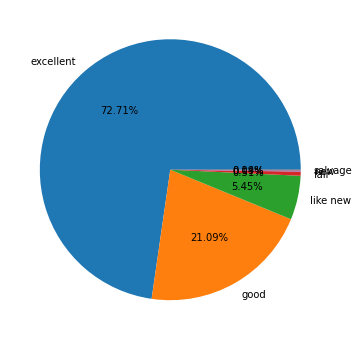

In [96]:
## Pie Chart for condition column

plt.figure(figsize=(10,6))
plt.pie(df.condition.value_counts().values,labels=df.condition.value_counts().index,autopct='%1.2f%%')
plt.show()

In [97]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['condition'] = LabelEncoding.fit_transform(df['condition'])

**cylinder**

In [98]:
df['cylinders'].isnull().sum()

80748

In [99]:
df['cylinders'].value_counts()

6 cylinders     45354
4 cylinders     43794
8 cylinders     30445
5 cylinders       905
10 cylinders      780
other             490
3 cylinders       219
12 cylinders       79
Name: cylinders, dtype: int64

In [100]:
# splitting the cylinder column

df['cylinders'] = df['cylinders'].str.split(' ').str[0]

In [101]:
# filling null values

df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [102]:
# replacing others value in cylinder column with 0
df['cylinders'] = df['cylinders'].replace(['other'],'0')


In [103]:
# changing into integer column

df['cylinders'] = df['cylinders'].astype('int')

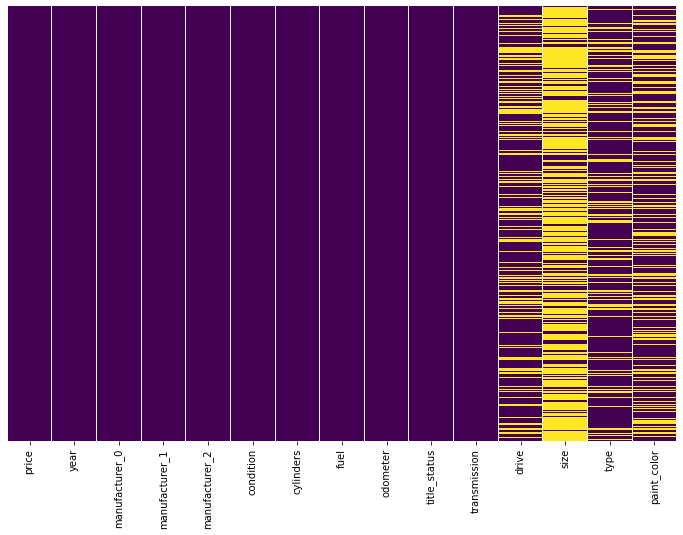

In [104]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, 'Features')

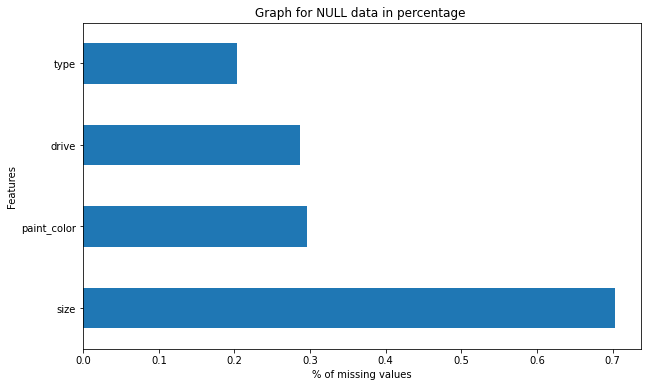

In [105]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**drive** 

In [106]:
df['drive'].isnull().sum()

58202

In [107]:
df['drive'].value_counts()

4wd    64941
fwd    55202
rwd    24469
Name: drive, dtype: int64

In [108]:
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])

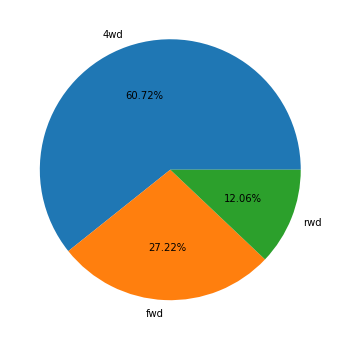

In [109]:
## Pie Chart for drive column

plt.figure(figsize=(10,6))
plt.pie(df.drive.value_counts().values,labels=df.drive.value_counts().index,autopct='%1.2f%%')
plt.show()

In [110]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['drive'] = LabelEncoding.fit_transform(df['drive'])

**type**

In [111]:
df['type'].isnull().sum()

41176

In [112]:
df['type'].value_counts()

sedan          47277
SUV            39237
pickup         17642
truck          16887
other           8589
coupe           8060
hatchback       7890
wagon           5703
van             3970
convertible     3738
mini-van        2240
offroad          214
bus              191
Name: type, dtype: int64

In [113]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

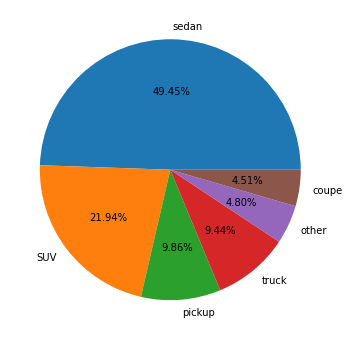

In [114]:
## Pie Chart for top 6 type column

plt.figure(figsize=(10,6))
plt.pie(df['type'].value_counts().values[:6],labels=df['type'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [115]:
# We are using one hot encoding

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
#encoder_df_2 = pd.DataFrame(encoder.fit_transform(df[['type']]).toarray())


In [118]:
#Create an object for Base N Encoding
encoder_type= ce.BaseNEncoder(cols=['type'],return_df=True,base=5)

In [119]:
df=encoder_type.fit_transform(df)
df

,price,year,manufacturer_0,manufacturer_1,manufacturer_2,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type_0,type_1,paint_color
0,33590,2014.0,0,0,1,2,8,2,57923.0,0,2,0,NaN,0,1,white
1,22590,2010.0,0,0,2,2,8,2,71229.0,0,2,0,NaN,0,1,blue
2,30990,2017.0,0,0,3,2,8,2,41124.0,0,2,0,NaN,0,1,red
3,15000,2013.0,0,0,4,0,6,2,128000.0,0,0,2,full-size,0,2,black
4,27990,2012.0,0,0,1,2,8,2,68696.0,0,2,0,NaN,0,1,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202809,7477,2012.0,1,1,1,0,6,2,64267.0,0,1,0,NaN,1,1,NaN
202810,39990,2017.0,0,2,1,2,8,2,41664.0,0,0,0,NaN,1,2,black
202811,29590,2016.0,0,0,3,2,6,2,53475.0,0,0,0,NaN,0,3,black
202812,32990,2016.0,0,2,1,2,8,2,55612.0,0,0,2,NaN,1,2,black


Text(0, 0.5, 'Features')

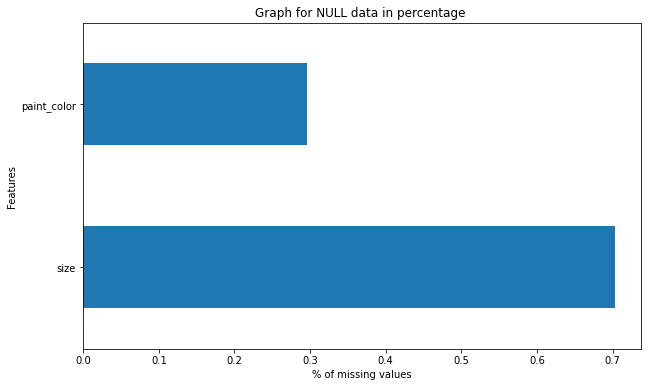

In [120]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

Size column contains about 70 percent of the Null values, dropping this column for now

In [121]:
# size column drop

df.drop('size' , axis =1 , inplace = True)

**paint_color**         

In [122]:
df['paint_color'].isnull().sum()

59996

In [123]:
df['paint_color'].value_counts()

white     37225
black     31770
silver    21748
blue      14183
red       13592
grey      13417
custom     3368
brown      3020
green      2679
orange      797
yellow      760
purple      259
Name: paint_color, dtype: int64

In [124]:
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

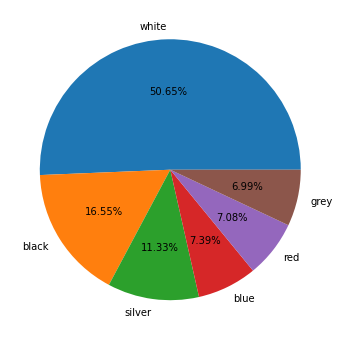

In [125]:
## Pie Chart for top 6 paint_color column

plt.figure(figsize=(10,6))
plt.pie(df['paint_color'].value_counts().values[:6],labels=df['paint_color'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [126]:
# We are using one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
#encoder_df_3 = pd.DataFrame(encoder.fit_transform(df[['paint_color']]).toarray())

In [127]:
encoder_paint = ce.BaseNEncoder(cols=['paint_color'],return_df=True,base=5)
df = encoder_paint.fit_transform(df)
df


,price,year,manufacturer_0,manufacturer_1,manufacturer_2,condition,cylinders,fuel,odometer,title_status,transmission,drive,type_0,type_1,paint_color_0,paint_color_1
0,33590,2014.0,0,0,1,2,8,2,57923.0,0,2,0,0,1,0,1
1,22590,2010.0,0,0,2,2,8,2,71229.0,0,2,0,0,1,0,2
2,30990,2017.0,0,0,3,2,8,2,41124.0,0,2,0,0,1,0,3
3,15000,2013.0,0,0,4,0,6,2,128000.0,0,0,2,0,2,0,4
4,27990,2012.0,0,0,1,2,8,2,68696.0,0,2,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202809,7477,2012.0,1,1,1,0,6,2,64267.0,0,1,0,1,1,0,1
202810,39990,2017.0,0,2,1,2,8,2,41664.0,0,0,0,1,2,0,4
202811,29590,2016.0,0,0,3,2,6,2,53475.0,0,0,0,0,3,0,4
202812,32990,2016.0,0,2,1,2,8,2,55612.0,0,0,2,1,2,0,4


In [128]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

price             0.0
year              0.0
manufacturer_0    0.0
manufacturer_1    0.0
manufacturer_2    0.0
condition         0.0
cylinders         0.0
fuel              0.0
odometer          0.0
title_status      0.0
transmission      0.0
drive             0.0
type_0            0.0
type_1            0.0
paint_color_0     0.0
paint_color_1     0.0
dtype: float64

In [129]:
X_data = df.drop('price',axis =1 )
y_data = df['price']

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [131]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(162251, 15) (162251,)
(40563, 15) (40563,)


In [133]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [135]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

n_est = [10,20,30,40,50,60,70,80,90,100]
for i in n_est:
  regressor = RandomForestRegressor(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

n_estimators: 10
Mean Absolute Error: 9616.59
Mean Squared Error: 554398069222.14
Root Mean Squared Error: 744579.12
n_estimators: 20
Mean Absolute Error: 9047.37
Mean Squared Error: 520899192516.67
Root Mean Squared Error: 721733.46
n_estimators: 30
Mean Absolute Error: 9185.27
Mean Squared Error: 580733272208.75
Root Mean Squared Error: 762058.58
n_estimators: 40
Mean Absolute Error: 13767.33
Mean Squared Error: 791417461205.25
Root Mean Squared Error: 889616.47
n_estimators: 50
Mean Absolute Error: 12494.16
Mean Squared Error: 669717393905.41
Root Mean Squared Error: 818362.63
n_estimators: 60
Mean Absolute Error: 11944.62
Mean Squared Error: 641916366421.86
Root Mean Squared Error: 801196.83
n_estimators: 70
Mean Absolute Error: 13634.98
Mean Squared Error: 698865440631.23
Root Mean Squared Error: 835981.72
n_estimators: 80
Mean Absolute Error: 13529.98
Mean Squared Error: 704566199771.42
Root Mean Squared Error: 839384.42
n_estimators: 90
Mean Absolute Error: 12927.21
Mean Squared

In [ ]:
regressor.score(X_test,y_test)

-18.957532998834328

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score(X_test,y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 27687.16
Mean Squared Error: 7576319531828.65
Root Mean Squared Error: 2752511.5


In [ ]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

Multi_Linear_model = LinearRegression()
Multi_Linear_model.fit(X_train, y_train)
y_pred = Multi_Linear_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)
Multi_Linear_model.score(X_test,y_test)

-0.14549929290711416

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 138916.31
Mean Squared Error: 434856786510.39
Root Mean Squared Error: 659436.72


In [ ]:
df

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,comp_ford,comp_chevrolet,comp_toyota,comp_nissan,comp_jeep,comp_bmw,comp_honda,comp_ram,comp_mercedes-benz,comp_gmc,comp_dodge,comp_hyundai,comp_volkswagen,comp_kia,comp_subaru,comp_lexus,comp_audi,comp_chrysler,comp_cadillac,comp_mazda,comp_buick,comp_acura,comp_infiniti,comp_lincoln,comp_volvo,comp_mini,comp_mitsubishi,comp_rover,comp_porsche,comp_pontiac,comp_jaguar,comp_saturn,comp_mercury,comp_fiat,comp_tesla,comp_alfa-romeo,comp_harley-davidson,comp_ferrari,comp_land rover,comp_aston-martin,type_sedan,type_SUV,type_pickup,type_truck,type_other,type_coupe,type_hatchback,type_wagon,type_van,type_convertible,type_mini-van,type_offroad,type_bus,paint_color_white,paint_color_black,paint_color_silver,paint_color_blue,paint_color_red,paint_color_grey,paint_color_custom,paint_color_brown,paint_color_green,paint_color_orange,paint_color_yellow,paint_color_purple
0,33590,2014.0,2,8,2,57923.0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22590,2010.0,2,8,2,71229.0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30990,2017.0,2,8,2,41124.0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,15000,2013.0,0,6,2,128000.0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27990,2012.0,2,8,2,68696.0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202809,7477,2012.0,0,6,2,64267.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
202810,39990,2017.0,2,8,2,41664.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202811,29590,2016.0,2,6,2,53475.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202812,32990,2016.0,2,8,2,55612.0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.year.describe()

count    202814.000000
mean       2012.789181
std           4.439894
min        1995.000000
25%        2011.000000
50%        2014.000000
75%        2016.000000
max        2022.000000
Name: year, dtype: float64

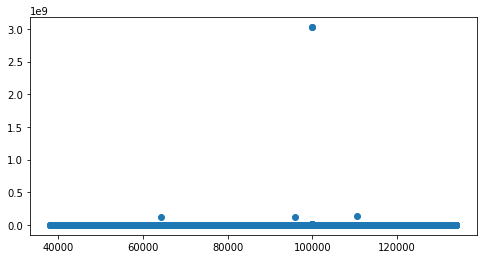

In [ ]:
plt.scatter(df.odometer,df.price)